
# 🧮 Credit Risk Modeling: PD, LGD, EAD, and Expected Loss

This notebook implements a complete **credit risk model** framework, covering:
- **Probability of Default (PD)**
- **Loss Given Default (LGD)**
- **Exposure at Default (EAD)**
- **Expected Loss (EL)**

The workflow follows the Basel regulatory definitions:

EL = PD $\times$ LGD $\times$ EAD

Each section introduces the data, models, assumptions, and validation metrics.  
All original outputs and model results are preserved.



## 1. Data Preparation and Exploration

This section loads the dataset, performs preprocessing, and explores relevant features.  
Typical tasks include:
- Reading data from CSV  
- Cleaning and handling missing values  
- Encoding categorical variables  
- Exploratory Data Analysis (EDA)


# Import data

In [100]:
# Purpose: Import libraries and configure environment.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set pandas display options to show all columns for better visibility
pd.options.display.max_columns = None

In [4]:
# Purpose: Load dataset from disk into a DataFrame.
file_path = '/content/drive/MyDrive/credit risk/loan_data_2007_2014.csv'

data = pd.read_csv(file_path, low_memory=False, index_col=0)

data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648.0,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687.0,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956.0,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598.0,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783.0,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
# Purpose: General computation or utility logic for the pipeline.
data.shape

(34706, 74)

In [6]:
# Purpose: General computation or utility logic for the pipeline.
pd.options.display.max_columns = None

In [7]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
count,3.470600e+04,3.470600e+04,34706.000000,34706.000000,34706.000000,34706.000000,34706.000000,3.470600e+04,34705.000000,34705.000000,34705.000000,11836.000000,1842.000000,34705.000000,34705.000000,34705.000000,34674.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.000000,34705.0,0.0,34705.0,0.0,0.0,0.0,34705.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,7.296045e+05,9.159286e+05,11487.438771,11206.940443,11017.809542,12.065636,327.104927,6.941086e+04,13.481497,0.145426,0.844979,37.075617,92.411509,9.281343,0.054949,13275.004985,49.426850,22.251549,157.226107,156.309382,12403.523500,12192.689395,9930.704567,2376.274448,1.215025,95.329480,11.086216,2808.480346,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,1.823520e+05,2.144413e+05,7652.149692,7359.428827,7210.341586,3.879880,211.161671,6.523759e+04,6.679161,0.492540,1.050944,21.454869,21.943264,4.377472,0.237542,15670.766607,28.213119,11.400387,804.115856,800.603755,9164.395243,8977.703743,7140.766786,2733.500459,6.651838,682.724893,134.314494,4594.674848,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,5.724500e+04,1.381500e+05,1000.000000,1000.000000,400.000000,5.420000,19.870000,4.080000e+03,0.000000,0.000000,0.000000,1.000000,6.000000,2.000000,0.000000,0.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,5.742778e+05,7.382362e+05,5550.000000,5500.000000,5500.000000,8.900000,167.730000,4.100000e+04,8.360000,0.000000,0.000000,19.000000,87.000000,6.000000,0.000000,3743.000000,26.200000,14.000000,0.000000,0.000000,5626.210000,5567.110000,4712.620000,669.210000,0.000000,0.000000,0.000000,228.480000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,7.148985e+05,9.080905e+05,10000.000000,10000.000000,9750.000000,11.830000,282.690000,6.000000e+04,13.570000,0.000000,1.000000,35.000000,97.000000,9.000000,0.000000,8865.000000,50.100000,21.000000,0.000000,0.000000,10162.763540,10016.320000,8274.990000,1380.470000,0.000000,0.000000,0.000000,571.320000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,8.596645e+05,1.071721e+06,15000.000000,15000.000000,14964.840145,14.790000,434.400000,8.300000e+04,18.760000,0.000000,1.000000,53.000000,108.000000,12.000000,0.000000,16912.000000,72.900000,29.000000,0.000000,0.000000,16864.760000,16580.000000,14000.000000,3011.460000,0.000000,0.000000,0.000000,3523.350000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,1.077501e+06,1.314167e+06,35000.000000,35000.000000,35000.000000,24.590000,1305.190000,6.000000e+06,29.990000,11.000000,8.000000,120.000000,119.000000,44.000000,4.000000,149588.000000,99.900000,90.000000,10418.060000,10410.560000,56809.051630,56475.050000,35000.030000,23062.450000,166.429711,29623.350000,7002.190000,36115.200000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data.info(show_counts=True)

<class 'pandas.core.frame.DataFrame'>
Index: 34706 entries, 0 to 34705
Data columns (total 74 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           34706 non-null  int64  
 1   member_id                    34706 non-null  int64  
 2   loan_amnt                    34706 non-null  int64  
 3   funded_amnt                  34706 non-null  int64  
 4   funded_amnt_inv              34706 non-null  float64
 5   term                         34706 non-null  object 
 6   int_rate                     34706 non-null  float64
 7   installment                  34706 non-null  float64
 8   grade                        34706 non-null  object 
 9   sub_grade                    34706 non-null  object 
 10  emp_title                    32424 non-null  object 
 11  emp_length                   33628 non-null  object 
 12  home_ownership               34706 non-null  object 
 13  annual_inc           

In [ ]:
# Purpose: Visualize distributions, relationships, or diagnostics.
# corr = data[numerical_cols].corr()
# plt.figure(figsize=(19,19))
# sns.heatmap(corr, annot=True, cmap='coolwarm',    fmt=".2f",          # Format the annotations to 2 decimal places
#     linewidths=.5,      # Add lines between cells
#     cbar=True   )

# Preprocessing


In [9]:
# Purpose: General computation or utility logic for the pipeline.
data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [10]:
# Purpose: Clean and transform features (missing values, casting, capping).
data['emp_length_int'] = data['emp_length'].fillna(str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace('10+ years',"10")
data['emp_length_int'] = data['emp_length_int'].str.replace('< 1 year',str(0))
data['emp_length_int'] = data['emp_length_int'].str.replace(' years', '')
data['emp_length_int'] = data['emp_length_int'].str.replace(' year', '')

In [11]:
# Purpose: Feature engineering: derive model inputs from raw fields.
data['emp_length_int'] = pd.to_numeric(data['emp_length_int'])
type(data['emp_length_int'][0])

numpy.int64

In [12]:
# Purpose: Clean and transform features (missing values, casting, capping).
data['term_int'] = data['term'].str.strip()
data['term_int'] = data['term_int'].str.replace(' months',"")
data['term_int'] = pd.to_numeric(data['term_int'])
type(data['term_int'][0])

numpy.int64

In [13]:
# Purpose: Clean and transform features (missing values, casting, capping).
data = data.dropna(subset=['earliest_cr_line'])

In [14]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Function to handle the year conversion
def convert_year(year_str):
    year = int(year_str)
    if year > 18: # Assuming '23' as the cutoff for years before 2000
        return 1900 + year
    else:
        return 2000 + year

# Apply the conversion and convert to datetime
data['earliest_cr_line_date'] = data['earliest_cr_line'].apply(lambda x: f"{x[:4]}{convert_year(x[4:])}")
data['earliest_cr_line_date'] = pd.to_datetime(data['earliest_cr_line_date'], format='%b-%Y')

# Display the head of the new column
display(data['earliest_cr_line_date'].head())

,earliest_cr_line_date
0,1985-01-01
1,1999-04-01
2,2001-11-01
3,1996-02-01
4,1996-01-01


In [15]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data['mths_since_earliest_cr_line'] = round(
    (pd.to_datetime('2017-12-01') - data['earliest_cr_line_date']) / np.timedelta64(1, 'D') / 30.44)
display(data['mths_since_earliest_cr_line'].head())

,mths_since_earliest_cr_line
0,395.0
1,224.0
2,193.0
3,262.0
4,263.0


In [16]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data['issue_d_date'] = pd.to_datetime(data['issue_d'], format="%b-%y")
data['mths_since_issue_d'] = round(pd.to_numeric(((pd.to_datetime('2017-12-01') - data['issue_d_date'])/np.timedelta64(1,'D'))/30.44))
data['mths_since_issue_d'].describe()

,mths_since_issue_d
count,34705.000000
mean,81.677655
std,7.168466
min,72.000000
25%,75.000000
50%,80.000000
75%,87.000000
max,98.000000


In [17]:
# Purpose: Encode categorical variables and/or scale numerical features.
data_dummies = [pd.get_dummies(data['grade'], prefix = 'grade', prefix_sep = ':'),
                     pd.get_dummies(data['sub_grade'], prefix = 'sub_grade', prefix_sep = ':'),
                     pd.get_dummies(data['home_ownership'], prefix = 'home_ownership', prefix_sep = ':'),
                     pd.get_dummies(data['verification_status'], prefix = 'verification_status', prefix_sep = ':'),
                     pd.get_dummies(data['loan_status'], prefix = 'loan_status', prefix_sep = ':'),
                     pd.get_dummies(data['purpose'], prefix = 'purpose', prefix_sep = ':'),
                     pd.get_dummies(data['addr_state'], prefix = 'addr_state', prefix_sep = ':'),
                     pd.get_dummies(data['initial_list_status'], prefix = 'initial_list_status', prefix_sep = ':')]

data_dummies = pd.concat(data_dummies, axis = 1)

data = pd.concat([data, data_dummies], axis=1)
data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state:TN', 'addr_state:TX', 'addr_state:UT', 'addr_state:VA',
       'addr_state:VT', 'addr_state:WA', 'addr_state:WI', 'addr_state:WV',
       'addr_state:WY', 'initial_list_status:f'],
      dtype='object', length=197)


## 2. Probability of Default (PD) Modeling

The PD model estimates the likelihood that a borrower will default.  
This section typically uses **logistic regression** or similar classification techniques.

Key steps:
- Define default indicator (1 if defaulted, else 0)  
- Split data into training and test sets  
- Fit logistic regression model  
- Evaluate using AUC, confusion matrix, and accuracy


# PD

In [101]:
# Purpose: General computation or utility logic for the pipeline.
# Check the unique values in the 'loan_status' column to understand the different loan states
data['loan_status'].unique()

array(['Fully Paid', 'Charged Off', 'Current', 'Default',
       'Late (31-120 days)', 'In Grace Period', 'Late (16-30 days)'],
      dtype=object)

In [102]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Create a binary target variable 'good_bad' where 0 represents a default (Charged Off, Default, Late 31-120 days) and 1 represents a non-default (Fully Paid, Current, In Grace Period, Late 16-30 days).
data['good_bad'] = np.where(data['loan_status'].isin(['Charged Off', 'Default',
                                                               'Does not meet the credit policy. Status:Charged Off',
                                                               'Late (31-120 days)']),0,1)
# Display the counts of each class in the 'good_bad' column
data['good_bad'].value_counts()

,count
good_bad,
1,29780
0,4925


In [103]:
# Purpose: General computation or utility logic for the pipeline.
# Define categorical and continuous features to be used in the PD model.
# Categorical features are identified based on a search list of prefixes.
# Continuous features are explicitly listed.
cat_features = []

search_list = ['addr_state:', 'grade:', 'home_ownership:', 'purpose:', 'verification_status:']
for sr in search_list:
  l = [col for col in data.columns if sr in col]
  n = len(l)
  if sr == 'grade:':
    l = l[:6] # Select only the first 6 grade categories
  cat_features.extend(l[:n-1]) # Exclude the last category for each feature to avoid multicollinearity (dummy variable trap)

cont_features = ['annual_inc', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'loan_amnt', 'open_acc', 'pub_rec',
                 'revol_util', 'total_acc', 'mths_since_earliest_cr_line', 'emp_length_int', 'mths_since_issue_d', 'term_int']

# Combine all selected features and the target variable
features = cont_features + cat_features + ['good_bad']

In [104]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Create a new DataFrame 'df' containing only the selected features and the target variable.
df = data[features].copy()

# Convert categorical features to integer type for model compatibility
df[cat_features] = df[cat_features].astype('int64')

# Display the first few rows of the new DataFrame
display(df.head())

,annual_inc,delinq_2yrs,dti,inq_last_6mths,loan_amnt,open_acc,pub_rec,revol_util,total_acc,mths_since_earliest_cr_line,emp_length_int,mths_since_issue_d,term_int,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,verification_status:Not Verified,verification_status:Source Verified,good_bad
0,24000.0,0.0,27.65,1.0,5000,3.0,0.0,83.7,9.0,395.0,10,72.0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,30000.0,0.0,1.00,5.0,2500,3.0,0.0,9.4,4.0,224.0,0,72.0,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12252.0,0.0,8.72,2.0,2400,2.0,0.0,98.5,10.0,193.0,10,72.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,49200.0,0.0,20.00,1.0,10000,10.0,0.0,21.0,37.0,262.0,10,72.0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,80000.0,0.0,17.94,0.0,3000,15.0,0.0,53.9,38.0,263.0,1,72.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [105]:
# Purpose: Clean and transform features (missing values, casting, capping).
# Drop rows with missing values in the 'revol_util' column, as it's an important feature and imputation might be complex.
df = df.dropna(subset=['revol_util'])

In [106]:
# Purpose: Set file paths (Colab/Drive) and verify accessibility.
# Save the cleaned and feature-engineered DataFrame to a parquet file for later use.
df_path = '/content/drive/MyDrive/credit risk/data_cleaned_2.parquet'

df.to_parquet(df_path)

In [107]:
# Purpose: Load dataset from disk into a DataFrame.
# Load the cleaned data from the parquet file (optional, for continuing from this point)
# df = pd.read_parquet(df_path)

In [108]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Display the first few rows of the loaded DataFrame to confirm it's correct.
df.head()

,annual_inc,delinq_2yrs,dti,inq_last_6mths,loan_amnt,open_acc,pub_rec,revol_util,total_acc,mths_since_earliest_cr_line,emp_length_int,mths_since_issue_d,term_int,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,verification_status:Not Verified,verification_status:Source Verified,good_bad
0,24000.0,0.0,27.65,1.0,5000,3.0,0.0,83.7,9.0,395.0,10,72.0,36,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,30000.0,0.0,1.00,5.0,2500,3.0,0.0,9.4,4.0,224.0,0,72.0,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,12252.0,0.0,8.72,2.0,2400,2.0,0.0,98.5,10.0,193.0,10,72.0,36,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
3,49200.0,0.0,20.00,1.0,10000,10.0,0.0,21.0,37.0,262.0,10,72.0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1
4,80000.0,0.0,17.94,0.0,3000,15.0,0.0,53.9,38.0,263.0,1,72.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,1


In [109]:
# Purpose: Evaluate PD model performance (AUC, ROC, confusion matrix, PR metrics).
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    f1_score, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score,
    log_loss, ConfusionMatrixDisplay, classification_report
)

# Function to visualize Confusion Matrix and ROC Curve
def confusionm_roc(ytest, ypred, ypredproba):
    cm = confusion_matrix(ytest, ypred)

    fig, axes = plt.subplots(1, 2, figsize=(12, 5))

    # 1. Confusion Matrix
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', ax=axes[0])
    axes[0].set_title('Confusion Matrix')
    axes[0].set_xlabel('Predicted')
    axes[0].set_ylabel('Actual')

    # 2. ROC Curve
    fpr, tpr, _ = roc_curve(ytest, ypredproba)
    axes[1].plot(fpr, tpr, label='Model')
    axes[1].plot([0, 1], [0, 1], 'k--', label='Random')
    axes[1].set_xlabel('False Positive Rate')
    axes[1].set_ylabel('True Positive Rate')
    axes[1].set_title('ROC Curve')
    axes[1].legend()

    plt.tight_layout()
    plt.show()

# Function to print various classification evaluation scores
def accu_scores(ytest, ypred, ypredproba):
    # Calculate the confusion matrix to get TN, FP, FN, TP
    cm = confusion_matrix(ytest, ypred)
    tn, fp, fn, tp = cm.ravel()

    # Calculate Specificity
    specificity = tn / (tn + fp) if (tn + fp) > 0 else 0

    print("Accuracy:", accuracy_score(ytest, ypred))
    print("Precision:", precision_score(ytest, ypred))
    print("Recall:", recall_score(ytest, ypred))
    print("Specificity:", specificity) # Added specificity
    print("F1 Score:", f1_score(ytest, ypred))
    print("ROC AUC:", roc_auc_score(ytest, ypredproba))

In [110]:
# Purpose: Split data into train/test (holdout) sets for out-of-sample validation.
from sklearn.model_selection import train_test_split

# Separate features (X) and target variable (y)
X = df.drop(columns=['good_bad'], axis = 1)
y = df['good_bad']

# Split the data into training and testing sets, maintaining the proportion of the target variable (stratify=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=47, test_size=0.2, stratify=y)

In [111]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Display the counts of the target variable in the original dataset to check the class distribution
y.value_counts()

,count
good_bad,
1,29759
0,4915


# PD model

In [112]:
# Purpose: Visualize distributions, relationships, or diagnostics.
# Visualize the correlation matrix of the features (commented out to avoid large output by default)
# corr = X.corr()

# plt.figure(figsize=(30,30))

# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f",          # Format the annotations to 2 decimal places
#     linewidths=.5,      # Add lines between cells
#     cbar=True   )

# plt.show()

In [113]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
# Redefine continuous and categorical features lists (already done but keeping for clarity within this section)
cont_features = ['annual_inc', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'loan_amnt', 'open_acc', 'pub_rec',
                 'revol_util', 'total_acc', 'mths_since_earliest_cr_line', 'emp_length_int', 'mths_since_issue_d', 'term_int']

cat_features = ['addr_state:AK', 'addr_state:AL', 'addr_state:AR', 'addr_state:AZ', 'addr_state:CA', 'addr_state:CO', 'addr_state:CT', 'addr_state:DC', 'addr_state:DE', 'addr_state:FL', 'addr_state:GA', 'addr_state:HI', 'addr_state:IA', 'addr_state:IL', 'addr_state:KS', 'addr_state:KY', 'addr_state:LA', 'addr_state:MA', 'addr_state:MD', 'addr_state:MI', 'addr_state:MN', 'addr_state:MO', 'addr_state:MS', 'addr_state:MT', 'addr_state:NC', 'addr_state:NH', 'addr_state:NJ', 'addr_state:NM', 'addr_state:NV', 'addr_state:NY', 'addr_state:OH', 'addr_state:OK', 'addr_state:OR', 'addr_state:PA', 'addr_state:RI', 'addr_state:SC', 'addr_state:SD', 'addr_state:TN', 'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT', 'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'grade:A', 'grade:B', 'grade:C', 'grade:D', 'grade:E', 'grade:F', 'home_ownership:MORTGAGE', 'home_ownership:OTHER', 'home_ownership:OWN', 'purpose:car', 'purpose:credit_card', 'purpose:debt_consolidation', 'purpose:educational', 'purpose:home_improvement', 'purpose:house', 'purpose:major_purchase', 'purpose:medical', 'purpose:moving', 'purpose:other', 'purpose:renewable_energy', 'purpose:small_business', 'purpose:vacation', 'verification_status:Not Verified', 'verification_status:Source Verified']

features = cont_features + cat_features + ['good_bad']

In [114]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Create a ColumnTransformer to apply StandardScaler to continuous features and leave categorical features untouched.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_features), # Apply StandardScaler to continuous features

        ('cat', 'passthrough', cat_features) # Leave categorical features as they are (already one-hot encoded)
    ],
    remainder='drop' # Drop any columns not specified in transformers
)

In [115]:
# Purpose: General computation or utility logic for the pipeline.
# Fit the preprocessor on the training data and transform both training and testing data.
preprocessor.fit(X_train)

X_train_scaled = preprocessor.transform(X_train)

X_test_scaled = preprocessor.transform(X_test)

In [116]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Convert the scaled training data back to a DataFrame with appropriate column names and index.
# Assuming 'preprocessor' is your fitted ColumnTransformer object
feature_names = preprocessor.get_feature_names_out()

X_train_processed = pd.DataFrame(
    X_train_scaled,
    columns=feature_names,
    index=X_train.index # Keep the original index for easy joining/tracking
)

# Display the first few rows of the processed training data
display(X_train_processed.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
20778,0.317280,-0.293921,-1.694407,-0.804627,-0.717537,-1.208172,-0.230846,1.256465,-0.373183,0.459573,1.406666,0.181503,1.499502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2997,0.746269,-0.293921,-0.095850,-0.804627,-0.521373,-0.751177,-0.230846,1.724381,-0.724798,0.289285,-0.818855,-1.213000,-0.666888,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
398,0.289499,-0.293921,-0.868959,-0.804627,-0.344825,1.762294,-0.230846,1.252920,1.384892,0.191977,1.406666,-1.352450,1.499502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27560,-0.111709,-0.293921,-0.595306,2.056977,-0.194433,-0.522680,-0.230846,0.618397,-0.812702,-0.683791,-1.097045,0.878755,1.499502,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29032,-0.530934,-0.293921,-0.064447,2.056977,-1.266796,-0.294183,-0.230846,0.107943,-0.373183,0.909620,-0.540665,1.157655,-0.666888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [117]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Convert the scaled testing data back to a DataFrame with appropriate column names and index.
X_test_processed = pd.DataFrame(
    X_test_scaled,
    columns=feature_names,
    index=X_test.index # Important: Keep the original index from X_test
)

# Display the first few rows of the processed testing data
display(X_test_processed.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
11920,0.124975,1.740788,-0.673065,1.103109,-0.521373,0.848305,-0.230846,-0.519490,1.736507,1.894859,-1.097045,-0.655199,1.499502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27670,-0.496319,-0.293921,-0.137721,-0.804627,0.459448,0.162812,3.954403,0.154026,-0.197375,-0.087782,-0.262475,1.018205,1.499502,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,-0.392770,-0.293921,0.867172,-0.804627,-0.259821,-0.294183,-0.230846,0.728287,1.033277,0.544717,1.406666,-1.213000,-0.666888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12876,-0.531822,-0.293921,-1.775157,-0.804627,-1.109865,-0.751177,-0.230846,-1.253267,-0.636894,-0.331051,1.406666,-0.515748,-0.666888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27764,0.687098,-0.293921,-1.202428,1.103109,0.328672,-0.065685,-0.230846,-0.998040,0.593758,-0.026965,1.406666,1.018205,-0.666888,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [118]:
# Purpose: Fit Probability of Default (PD) classification model.
from sklearn.linear_model import LogisticRegression

# Initialize and train a Logistic Regression model.
# Use 'balanced' class weight to handle potential class imbalance in the target variable.
# Increase max_iter for convergence.
logreg = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=47)

# Fit the model on the processed training data
logreg.fit(X_train_processed, y_train)

# Make predictions on the processed testing data
y_pred = logreg.predict(X_test_processed)
# Get the predicted probabilities for the positive class (class 1)
y_pred_proba = logreg.predict_proba(X_test_processed)[:, 1]

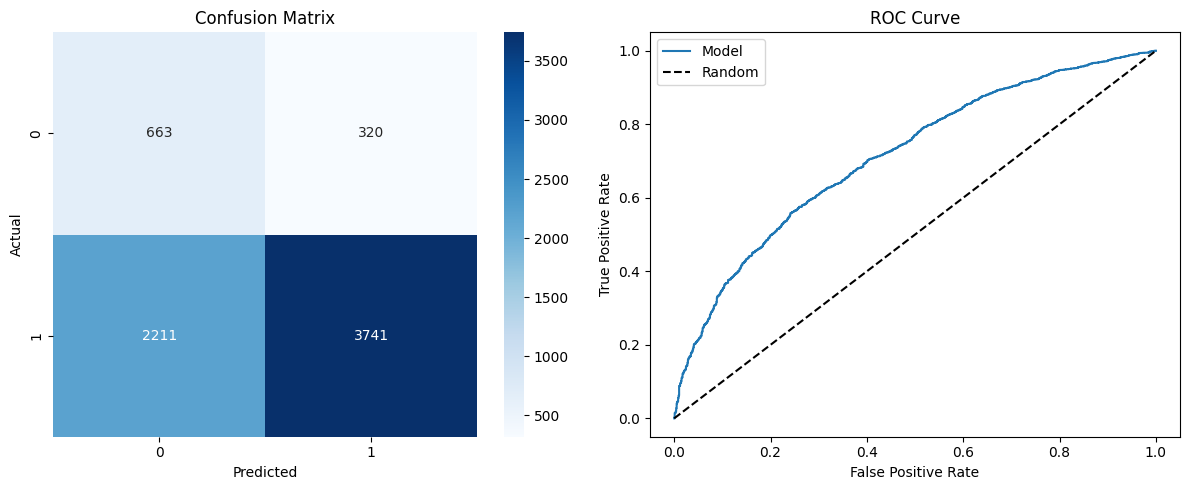

In [119]:
# Purpose: General computation or utility logic for the pipeline.
# Visualize the confusion matrix and ROC curve for the PD model
confusionm_roc(y_test, y_pred, y_pred_proba)

In [120]:
# Purpose: General computation or utility logic for the pipeline.
# Print various evaluation scores for the PD model
accu_scores(y_test, y_pred, y_pred_proba)

Accuracy: 0.6350396539293439
Precision: 0.9212016744644176
Recall: 0.6285282258064516
Specificity: 0.6744659206510681
F1 Score: 0.7472286028163387
ROC AUC: 0.7131133503429266


In [121]:
# Purpose: Cross-validation and/or hyperparameter search.
# Example of how to perform Grid Search for hyperparameter tuning (commented out)
# from sklearn.model_selection import GridSearchCV
# from sklearn.metrics import make_scorer, confusion_matrix, recall_score, accuracy_score, precision_score
# from sklearn.linear_model import LogisticRegression
# import numpy as np

# # Define a custom scorer for specificity
# def specificity_scorer(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     tn, fp, fn, tp = cm.ravel()
#     return tn / (tn + fp) if (tn + fp) > 0 else 0

# # Create the specificity scorer
# specificity = make_scorer(specificity_scorer)

# # Define an extended parameter grid for Grid Search
# param_grid = {
#     'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],  # Extended regularization parameter values
#     'solver': ['liblinear', 'lbfgs', 'saga'], # Commonly used and efficient solvers that support different penalties
#     'penalty': ['l1', 'l2', 'elasticnet', 'none'] # Penalties
# }

# # Create a Logistic Regression model instance
# # Keep class_weight as balanced
# logreg_grid = LogisticRegression(class_weight='balanced', max_iter=2000, random_state=47) # Increased max_iter for convergence

# # Create the GridSearchCV object
# # Note: Not all penalties are supported by all solvers. Grid search will handle invalid combinations.
# grid_search = GridSearchCV(estimator=logreg_grid, param_grid=param_grid, cv=5, scoring=specificity, verbose=1, n_jobs=-1)

# # Fit the Grid Search to the scaled training data
# grid_search.fit(X_train_processed, y_train)

# # Get the best parameters and best score
# print("Best parameters found:", grid_search.best_params_)
# print("Best specificity score found:", grid_search.best_score_)

# # Evaluate the best model on the test set
# best_logreg_model = grid_search.best_estimator_
# y_pred_grid = best_logreg_model.predict(X_test_processed)
# y_pred_proba_grid = best_logreg_model.predict_proba(X_test_processed)[:, 1]

# # Calculate and print the requested metrics for the best model
# print("\nEvaluation of the best model on the test set:")
# print("Accuracy:", accuracy_score(y_test, y_pred_grid))
# print("Precision:", precision_score(y_test, y_pred_grid))
# print("Recall:", recall_score(y_test, y_pred_grid))
# print("Specificity:", specificity_scorer(y_test, y_pred_grid))

Evaluating BalancedRandomForestClassifier at threshold = 0.4:



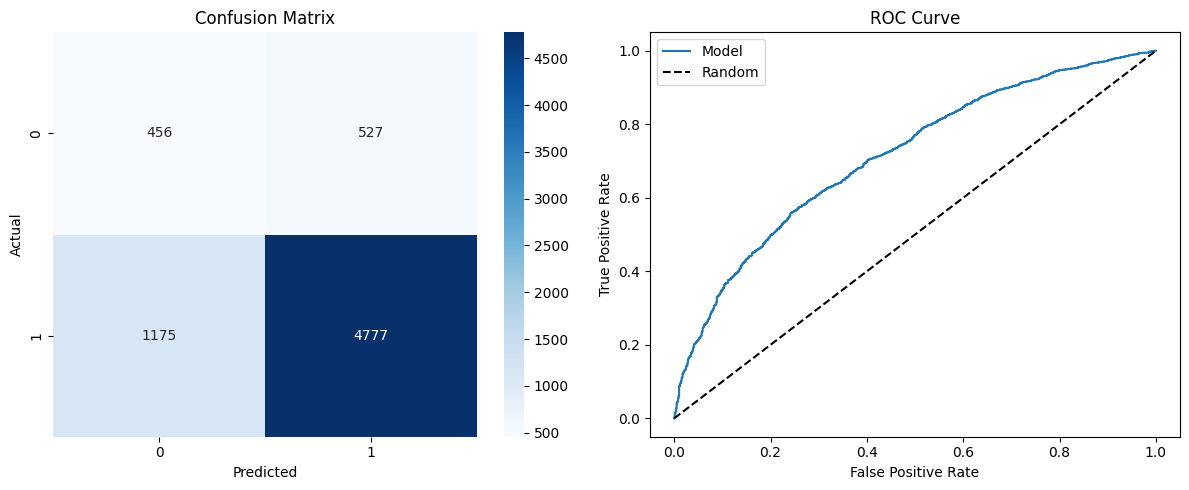

Accuracy: 0.7545782263878875
Precision: 0.9006410256410257
Recall: 0.8025873655913979
Specificity: 0.46388606307222785
F1 Score: 0.8487917555081734
ROC AUC: 0.7131133503429266


In [122]:
# Purpose: Clean and transform features (missing values, casting, capping).
# Evaluate the PD model at a custom threshold to see how performance metrics change.
# @title Evaluate at Custom Threshold
custom_threshold = 0.4 #@param {type:"number"}

# Apply the custom threshold to get binary predictions
y_pred_threshold = (y_pred_proba >= custom_threshold).astype(int)

# Evaluate the model performance at the custom threshold and print scores
print(f"Evaluating BalancedRandomForestClassifier at threshold = {custom_threshold}:\n")
confusionm_roc(y_test, y_pred_threshold, y_pred_proba)
accu_scores(y_test, y_pred_threshold, y_pred_proba)

# LGD

In [42]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data_defaults = data.loc[X_train.index]

data_defaults = data_defaults[data_defaults['loan_status'].isin(['Charged Off', 'Default', 'Late (31-120 days)'])]

data_defaults.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,emp_length_int,term_int,earliest_cr_line_date,mths_since_earliest_cr_line,issue_d_date,mths_since_issue_d,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G,sub_grade:A1,sub_grade:A2,sub_grade:A3,sub_grade:A4,sub_grade:A5,sub_grade:B1,sub_grade:B2,sub_grade:B3,sub_grade:B4,sub_grade:B5,sub_grade:C1,sub_grade:C2,sub_grade:C3,sub_grade:C4,sub_grade:C5,sub_grade:D1,sub_grade:D2,sub_grade:D3,sub_grade:D4,sub_grade:D5,sub_grade:E1,sub_grade:E2,sub_grade:E3,sub_grade:E4,sub_grade:E5,sub_grade:F1,sub_grade:F2,sub_grade:F3,sub_grade:F4,sub_grade:F5,sub_grade:G1,sub_grade:G2,sub_grade:G3,sub_grade:G4,sub_grade:G5,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,home_ownership:RENT,verification_status:Not Verified,verification_status:Source Verified,verification_status:Verified,loan_status:Charged Off,loan_status:Current,loan_status:Default,loan_status:Fully Paid,loan_status:In Grace Period,loan_status:Late (16-30 days),loan_status:Late (31-120 days),purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,purpose:wedding,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,addr_state:WY,initial_list_status:f,good_bad
20778,646994,827786,6000,6000,6000.0,60 months,16.02,145.98,D,D5,Tyco Electronics,10+ years,MORTGAGE,91000.0,Not Verified,Jan-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 01/13/11 > payoff immediat...,debt_consolidation,personal loan,274xx,NC,2.15,0.0,Jan-94,0.0,50.0,NaN,4.0,0.0,4833.0,84.8,18.0,f,0.0,0.0,3624.62,3624.62,1694.43,1657.41,14.992236,257.79,2.430,Jan-13,150.00,NaN,Jun-13,0.0,NaN,1.0,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,60,1994-01-01,287.0,2011-01-01,83.0,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,T

In [43]:
# Purpose: Clean and transform features (missing values, casting, capping).
data_defaults = data_defaults.dropna(subset = ['revol_util'])


## 3. Loss Given Default (LGD) Modeling

The LGD model estimates the percentage of exposure lost when a borrower defaults.  
We use regression models to predict **recovery rate** or **loss rate** conditional on default.

Typical steps:
- Filter defaulted loans  
- Calculate LGD = (EAD - Recovery) / EAD  
- Fit regression model (e.g., linear regression, Beta regression)  
- Evaluate using R², RMSE, and residual analysis


In [44]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data_defaults.loc[:, 'recovery_rate'] = data_defaults['recoveries']/data_defaults['funded_amnt']

data_defaults['recovery_rate'].describe()

,recovery_rate
count,3932.000000
mean,0.051866
std,0.106912
min,0.000000
25%,0.000482
50%,0.031832
75%,0.048554
max,1.055029


In [45]:
# Purpose: General computation or utility logic for the pipeline.
data_test_full = data.loc[X_test.index]

y_test_lgd = data_test_full['recoveries']/data_test_full['funded_amnt']

y_test_lgd = np.where(y_test_lgd>1, 1, y_test_lgd)

In [46]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
data_defaults.loc[:, 'recovery_rate'] = np.where(data_defaults['recovery_rate'] > 1 , 1, data_defaults['recovery_rate'])

data_defaults['recovery_rate'].describe()

,recovery_rate
count,3932.000000
mean,0.051844
std,0.106707
min,0.000000
25%,0.000482
50%,0.031832
75%,0.048554
max,1.000000


In [47]:
# Purpose: General computation or utility logic for the pipeline.
cat_features = []

search_list = ['addr_state:', 'grade:', 'home_ownership:', 'purpose:', 'verification_status:']
for sr in search_list:
  l = [col for col in data_defaults.columns if sr in col]
  n = len(l)
  if sr == 'grade:':
    l = l[:6]
  cat_features.extend(l[:n-1])

cont_features = ['annual_inc', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'loan_amnt', 'open_acc', 'pub_rec',
                 'revol_util', 'total_acc', 'mths_since_earliest_cr_line', 'emp_length_int', 'mths_since_issue_d', 'term_int']

features = cont_features + cat_features + ['recovery_rate']

In [48]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
df_defaults = data_defaults[features].copy()

df_defaults[cat_features] = df_defaults[cat_features].astype('int64')

df_defaults.head()

,annual_inc,delinq_2yrs,dti,inq_last_6mths,loan_amnt,open_acc,pub_rec,revol_util,total_acc,mths_since_earliest_cr_line,emp_length_int,mths_since_issue_d,term_int,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,verification_status:Not Verified,verification_status:Source Verified,recovery_rate
20778,91000.0,0.0,2.15,0.0,6000,4.0,0.0,84.8,18.0,287.0,10,83.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.042965
8509,125000.0,0.0,11.32,0.0,20000,7.0,0.0,63.5,11.0,215.0,10,75.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.066724
12254,120000.0,0.0,19.32,0.0,4925,7.0,0.0,90.3,23.0,189.0,0,77.0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.370812
2294,75000.0,0.0,17.57,1.0,18000,9.0,0.0,97.3,15.0,215.0,10,72.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.000000
8704,95000.0,0.0,15.63,2.0,17800,8.0,0.0,77.5,26.0,203.0,4,75.0,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000980


<Axes: >

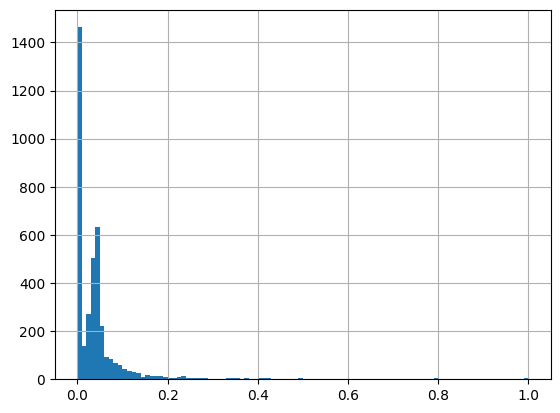

In [49]:
# Purpose: General computation or utility logic for the pipeline.
df_defaults['recovery_rate'].hist(bins=100)

In [50]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
df_defaults['recovery_rate_binary'] = np.where(df_defaults['recovery_rate'] == 0, 0, 1)

df_defaults['recovery_rate_binary'].value_counts()

,count
recovery_rate_binary,
1,2965
0,967


In [51]:
# Purpose: Split data into train/test (holdout) sets for out-of-sample validation.
from sklearn.model_selection import train_test_split

X_lgd = df_defaults.drop(columns=['recovery_rate', 'recovery_rate_binary'], axis = 1)
y_lgd = df_defaults['recovery_rate_binary']

# X_train_lgd, X_test_lgd, y_train_lgd, y_test_lgd = train_test_split(X_lgd, y_lgd, random_state=47, test_size=0.2, stratify=y_lgd)

In [52]:
# Purpose: General computation or utility logic for the pipeline.
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_features),

        ('cat', 'passthrough', cat_features)
    ],
    remainder='drop'
)

In [53]:
# Purpose: General computation or utility logic for the pipeline.
X_test_lgd = X_test[X_lgd.columns.to_list()]

preprocessor.fit(X_lgd)

X_train_scaled_lgd = preprocessor.transform(X_lgd)

X_test_scaled_lgd = preprocessor.transform(X_test_lgd)

In [54]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Assuming 'preprocessor' is your fitted ColumnTransformer object
feature_names = preprocessor.get_feature_names_out()

X_train_processed_lgd = pd.DataFrame(
    X_train_scaled_lgd,
    columns=feature_names,
    index=X_lgd.index # Keep the original index for easy joining/tracking
)

display(X_train_processed_lgd.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
20778,0.575311,-0.321603,-1.825795,-0.915185,-0.759453,-1.144342,-0.296085,1.029721,-0.305189,0.531232,1.375897,0.283846,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8509,1.261819,-0.321603,-0.428368,-0.915185,0.940046,-0.479580,-0.296085,0.261037,-0.917257,-0.362225,1.375897,-0.860267,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12254,1.160862,-0.321603,0.790762,-0.915185,-0.889950,-0.479580,-0.296085,1.228208,0.132002,-0.684863,-1.349970,-0.574239,-0.973891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2294,0.252248,-0.321603,0.524077,-0.020479,0.697261,-0.036405,-0.296085,1.480827,-0.567504,-0.362225,1.375897,-1.289310,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8704,0.656077,-0.321603,0.228438,0.874227,0.672982,-0.257993,-0.296085,0.766276,0.394317,-0.511135,-0.259623,-0.860267,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [55]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
X_test_processed_lgd = pd.DataFrame(
    X_test_scaled_lgd,
    columns=feature_names,
    index=X_test_lgd.index # Important: Keep the original index from X_test
)

display(X_test_processed_lgd.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
11920,0.312823,1.532565,-0.784963,0.874227,-0.577364,0.849944,-0.296085,-0.778310,1.793330,1.995509,-1.077383,-0.574239,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27670,-0.535217,-0.321603,-0.239403,-0.915185,0.333082,0.185182,3.189561,-0.092629,-0.130312,-0.027179,-0.259623,1.141931,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,-0.393877,-0.321603,0.784666,-0.915185,-0.334578,-0.257993,-0.296085,0.492003,1.093824,0.618096,1.375897,-1.146296,-0.973891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12876,-0.583677,-0.321603,-1.908086,-0.915185,-1.123631,-0.701167,-0.296085,-1.525340,-0.567504,-0.275361,1.375897,-0.431225,-0.973891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27764,1.080097,-0.321603,-1.324428,0.874227,0.211689,-0.036405,-0.296085,-1.265504,0.656632,0.034867,1.375897,1.141931,-0.973891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [56]:
# Purpose: Fit Probability of Default (PD) classification model.
from sklearn.linear_model import LogisticRegression

logreg_lgd = LogisticRegression(class_weight='balanced', max_iter=1000, random_state=47)

logreg_lgd.fit(X_train_processed_lgd, y_lgd)

y_pred_lgd = logreg_lgd.predict(X_test_processed_lgd)
y_pred_proba_lgd = logreg_lgd.predict_proba(X_test_processed_lgd)[:, 1]

## LGD linear reg

In [57]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
df_defaults_2 = df_defaults[df_defaults['recovery_rate_binary'] == 1]

df_defaults_2.head()

,annual_inc,delinq_2yrs,dti,inq_last_6mths,loan_amnt,open_acc,pub_rec,revol_util,total_acc,mths_since_earliest_cr_line,emp_length_int,mths_since_issue_d,term_int,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,verification_status:Not Verified,verification_status:Source Verified,recovery_rate,recovery_rate_binary
20778,91000.0,0.0,2.15,0.0,6000,4.0,0.0,84.8,18.0,287.0,10,83.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.042965,1
8509,125000.0,0.0,11.32,0.0,20000,7.0,0.0,63.5,11.0,215.0,10,75.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.066724,1
12254,120000.0,0.0,19.32,0.0,4925,7.0,0.0,90.3,23.0,189.0,0,77.0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.370812,1
8704,95000.0,0.0,15.63,2.0,17800,8.0,0.0,77.5,26.0,203.0,4,75.0,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.000980,1
19467,24000.0,0.0,19.65,0.0,5000,5.0,0.0,85.8,6.0,137.0,3,82.0,60,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.043722,1


In [60]:
# Purpose: Split data into train/test (holdout) sets for out-of-sample validation.
from sklearn.model_selection import train_test_split

X_lgd2 = df_defaults_2.drop(columns=['recovery_rate_binary', 'recovery_rate'], axis = 1)
y_lgd2 = df_defaults_2['recovery_rate']

In [61]:
# Purpose: Visualize distributions, relationships, or diagnostics.
# corr = X_lgd2.corr()

# plt.figure(figsize=(30,30))

# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f",          # Format the annotations to 2 decimal places
#     linewidths=.5,      # Add lines between cells
#     cbar=True   )

# plt.show()

In [62]:
# Purpose: General computation or utility logic for the pipeline.
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_features),

        ('cat', 'passthrough', cat_features)
    ],
    remainder='drop'
)

In [63]:
# Purpose: General computation or utility logic for the pipeline.
X_test_lgd2 = X_test[X_lgd2.columns.to_list()]

preprocessor.fit(X_lgd2)

X_train_scaled_lgd2 = preprocessor.transform(X_lgd2)

X_test_scaled_lgd2 = preprocessor.transform(X_test_lgd2)

In [64]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Assuming 'preprocessor' is your fitted ColumnTransformer object
feature_names = preprocessor.get_feature_names_out()

X_train_processed_lgd2 = pd.DataFrame(
    X_train_scaled_lgd2,
    columns=feature_names,
    index=X_lgd2.index # Keep the original index for easy joining/tracking
)

display(X_train_processed_lgd2.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
20778,0.629261,-0.319959,-1.777242,-0.898446,-0.750721,-1.128093,-0.27894,1.021245,-0.248106,0.576301,1.416692,0.309872,1.030481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8509,1.379583,-0.319959,-0.389893,-0.898446,0.949413,-0.461090,-0.27894,0.256788,-0.864438,-0.309703,1.416692,-0.839129,1.030481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12254,1.269242,-0.319959,0.820444,-0.898446,-0.881267,-0.461090,-0.27894,1.218639,0.192130,-0.629648,-1.345517,-0.551879,-0.970420,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8704,0.717534,-0.319959,0.262176,0.890002,0.682249,-0.238756,-0.27894,0.759248,0.456272,-0.457370,-0.240634,-0.839129,1.030481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
19467,-0.849316,-0.319959,0.870370,-0.898446,-0.872159,-0.905758,-0.27894,1.057135,-1.304674,-1.269540,-0.516855,0.166247,1.030481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0



## 4. Exposure at Default (EAD) Modeling

The EAD model estimates the expected exposure at the time of default.  
Common approach: model the **credit conversion factor (CCF)** = (EAD - Current Balance) / Current Balance.

Steps include:
- Compute CCF or ratio metrics  
- Fit regression models (linear or tree-based)  
- Validate predictions vs. actual exposures


In [65]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
X_test_processed_lgd2 = pd.DataFrame(
    X_test_scaled_lgd2,
    columns=feature_names,
    index=X_test_lgd2.index # Important: Keep the original index from X_test
)

display(X_test_processed_lgd2.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
11920,0.342373,1.487048,-0.743917,0.890002,-0.568564,0.872915,-0.278940,-0.776843,1.865029,2.028362,-1.069296,-0.551879,1.030481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27670,-0.584496,-0.319959,-0.202291,-0.898446,0.342222,0.205912,3.332662,-0.094934,-0.072012,0.022549,-0.240634,1.171623,1.030481,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,-0.430018,-0.319959,0.814392,-0.898446,-0.325688,-0.238756,-0.278940,0.486484,1.160651,0.662440,1.416692,-1.126379,-0.970420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12876,-0.637460,-0.319959,-1.858939,-0.898446,-1.115035,-0.683424,-0.278940,-1.519766,-0.512248,-0.223564,1.416692,-0.408254,-0.970420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27764,1.180969,-0.319959,-1.279491,0.890002,0.220784,-0.016422,-0.278940,-1.261358,0.720414,0.084077,1.416692,1.171623,-0.970420,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [66]:
# Purpose: Fit regression model (used for LGD/EAD estimation).
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error, r2_score

lreg_lgd2 = LinearRegression()

lreg_lgd2.fit(X_train_processed_lgd2, y_lgd2)

y_pred_lgd2 = lreg_lgd2.predict(X_test_processed_lgd2)

In [67]:
# Purpose: General computation or utility logic for the pipeline.
y_pred_lgd_all = y_pred_lgd * y_pred_lgd2

y_pred_lgd_all = np.where(y_pred_lgd_all < 0, 0, y_pred_lgd_all)

In [68]:
# Purpose: Evaluate regression performance (R², RMSE, MAE/MAPE).
rmse = root_mean_squared_error(y_test_lgd, y_pred_lgd_all)
mae = mean_absolute_error(y_test_lgd, y_pred_lgd_all)
r2s = r2_score(y_test_lgd, y_pred_lgd_all)

In [69]:
# Purpose: General computation or utility logic for the pipeline.
print(rmse, mae)

0.06840844802999214 0.03580862439580342


# EAD

In [77]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
data_defaults.loc[:, 'EADF'] = (data_defaults['funded_amnt'] - data_defaults['total_rec_prncp']) / data_defaults['funded_amnt']

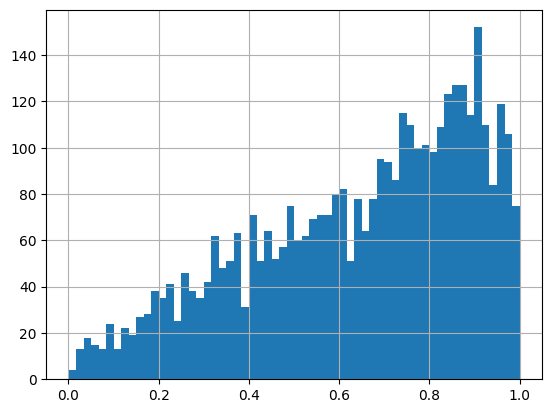

In [79]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
data_defaults['EADF'].hist(bins=60);

In [73]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
y_test_ead = (data_test_full['funded_amnt'] - data_test_full['total_rec_prncp'])/data_test_full['funded_amnt']

y_test_ead = np.where(y_test_ead < 0, 0, y_test_ead)

pd.DataFrame(y_test_ead).describe()

,0
count,6935.000000
mean,0.101953
std,0.246652
min,0.000000
25%,0.000000
50%,0.000000
75%,0.000000
max,1.000000


In [80]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
cat_features = []

search_list = ['addr_state:', 'grade:', 'home_ownership:', 'purpose:', 'verification_status:']
for sr in search_list:
  l = [col for col in data_defaults.columns if sr in col]
  n = len(l)
  if sr == 'grade:':
    l = l[:6]
  cat_features.extend(l[:n-1])

cont_features = ['annual_inc', 'delinq_2yrs', 'dti', 'inq_last_6mths', 'loan_amnt', 'open_acc', 'pub_rec',
                 'revol_util', 'total_acc', 'mths_since_earliest_cr_line', 'emp_length_int', 'mths_since_issue_d', 'term_int']

features = cont_features + cat_features + ['EADF']

df_defaults_ead = data_defaults[features].copy()

df_defaults_ead[cat_features] = df_defaults_ead[cat_features].astype('int64')

df_defaults_ead.head()

,annual_inc,delinq_2yrs,dti,inq_last_6mths,loan_amnt,open_acc,pub_rec,revol_util,total_acc,mths_since_earliest_cr_line,emp_length_int,mths_since_issue_d,term_int,addr_state:AK,addr_state:AL,addr_state:AR,addr_state:AZ,addr_state:CA,addr_state:CO,addr_state:CT,addr_state:DC,addr_state:DE,addr_state:FL,addr_state:GA,addr_state:HI,addr_state:IA,addr_state:IL,addr_state:KS,addr_state:KY,addr_state:LA,addr_state:MA,addr_state:MD,addr_state:MI,addr_state:MN,addr_state:MO,addr_state:MS,addr_state:MT,addr_state:NC,addr_state:NH,addr_state:NJ,addr_state:NM,addr_state:NV,addr_state:NY,addr_state:OH,addr_state:OK,addr_state:OR,addr_state:PA,addr_state:RI,addr_state:SC,addr_state:SD,addr_state:TN,addr_state:TX,addr_state:UT,addr_state:VA,addr_state:VT,addr_state:WA,addr_state:WI,addr_state:WV,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,home_ownership:MORTGAGE,home_ownership:OTHER,home_ownership:OWN,purpose:car,purpose:credit_card,purpose:debt_consolidation,purpose:educational,purpose:home_improvement,purpose:house,purpose:major_purchase,purpose:medical,purpose:moving,purpose:other,purpose:renewable_energy,purpose:small_business,purpose:vacation,verification_status:Not Verified,verification_status:Source Verified,EADF
20778,91000.0,0.0,2.15,0.0,6000,4.0,0.0,84.8,18.0,287.0,10,83.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0.717595
8509,125000.0,0.0,11.32,0.0,20000,7.0,0.0,63.5,11.0,215.0,10,75.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.447630
12254,120000.0,0.0,19.32,0.0,4925,7.0,0.0,90.3,23.0,189.0,0,77.0,36,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0.372729
2294,75000.0,0.0,17.57,1.0,18000,9.0,0.0,97.3,15.0,215.0,10,72.0,60,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0.801687
8704,95000.0,0.0,15.63,2.0,17800,8.0,0.0,77.5,26.0,203.0,4,75.0,60,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0.758039


In [81]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
X_ead = df_defaults_ead.drop(columns=['EADF'], axis = 1)
y_ead = df_defaults_ead['EADF']

In [ ]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
# corr = X_ead.corr()

# plt.figure(figsize=(30,30))

# sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f",          # Format the annotations to 2 decimal places
#     linewidths=.5,      # Add lines between cells
#     cbar=True   )

# plt.show()


## 5. Expected Loss (EL) Calculation

Expected Loss combines the outputs of PD, LGD, and EAD models:

EL_i = PD_i $\times$ LGD_i $\times$ EAD_i

This section calculates expected losses at both **loan** and **portfolio** levels,  
and analyzes distribution across risk segments.


In [82]:
# Purpose: General computation or utility logic for the pipeline.
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), cont_features),

        ('cat', 'passthrough', cat_features)
    ],
    remainder='drop'
)

In [83]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
X_test_ead = X_test[X_ead.columns.to_list()]

preprocessor.fit(X_ead)

X_train_scaled_ead = preprocessor.transform(X_ead)

X_test_scaled_ead = preprocessor.transform(X_test_ead)

In [84]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
# Assuming 'preprocessor' is your fitted ColumnTransformer object
feature_names = preprocessor.get_feature_names_out()

X_train_processed_ead = pd.DataFrame(
    X_train_scaled_ead,
    columns=feature_names,
    index=X_ead.index # Keep the original index for easy joining/tracking
)

display(X_train_processed_ead.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
20778,0.575311,-0.321603,-1.825795,-0.915185,-0.759453,-1.144342,-0.296085,1.029721,-0.305189,0.531232,1.375897,0.283846,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8509,1.261819,-0.321603,-0.428368,-0.915185,0.940046,-0.479580,-0.296085,0.261037,-0.917257,-0.362225,1.375897,-0.860267,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12254,1.160862,-0.321603,0.790762,-0.915185,-0.889950,-0.479580,-0.296085,1.228208,0.132002,-0.684863,-1.349970,-0.574239,-0.973891,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2294,0.252248,-0.321603,0.524077,-0.020479,0.697261,-0.036405,-0.296085,1.480827,-0.567504,-0.362225,1.375897,-1.289310,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
8704,0.656077,-0.321603,0.228438,0.874227,0.672982,-0.257993,-0.296085,0.766276,0.394317,-0.511135,-0.259623,-0.860267,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [85]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
X_test_processed_ead = pd.DataFrame(
    X_test_scaled_ead,
    columns=feature_names,
    index=X_test_ead.index # Important: Keep the original index from X_test
)

display(X_test_processed_ead.head())

,num__annual_inc,num__delinq_2yrs,num__dti,num__inq_last_6mths,num__loan_amnt,num__open_acc,num__pub_rec,num__revol_util,num__total_acc,num__mths_since_earliest_cr_line,num__emp_length_int,num__mths_since_issue_d,num__term_int,cat__addr_state:AK,cat__addr_state:AL,cat__addr_state:AR,cat__addr_state:AZ,cat__addr_state:CA,cat__addr_state:CO,cat__addr_state:CT,cat__addr_state:DC,cat__addr_state:DE,cat__addr_state:FL,cat__addr_state:GA,cat__addr_state:HI,cat__addr_state:IA,cat__addr_state:IL,cat__addr_state:KS,cat__addr_state:KY,cat__addr_state:LA,cat__addr_state:MA,cat__addr_state:MD,cat__addr_state:MI,cat__addr_state:MN,cat__addr_state:MO,cat__addr_state:MS,cat__addr_state:MT,cat__addr_state:NC,cat__addr_state:NH,cat__addr_state:NJ,cat__addr_state:NM,cat__addr_state:NV,cat__addr_state:NY,cat__addr_state:OH,cat__addr_state:OK,cat__addr_state:OR,cat__addr_state:PA,cat__addr_state:RI,cat__addr_state:SC,cat__addr_state:SD,cat__addr_state:TN,cat__addr_state:TX,cat__addr_state:UT,cat__addr_state:VA,cat__addr_state:VT,cat__addr_state:WA,cat__addr_state:WI,cat__addr_state:WV,cat__grade:A,cat__grade:B,cat__grade:C,cat__grade:D,cat__grade:E,cat__grade:F,cat__home_ownership:MORTGAGE,cat__home_ownership:OTHER,cat__home_ownership:OWN,cat__purpose:car,cat__purpose:credit_card,cat__purpose:debt_consolidation,cat__purpose:educational,cat__purpose:home_improvement,cat__purpose:house,cat__purpose:major_purchase,cat__purpose:medical,cat__purpose:moving,cat__purpose:other,cat__purpose:renewable_energy,cat__purpose:small_business,cat__purpose:vacation,cat__verification_status:Not Verified,cat__verification_status:Source Verified
11920,0.312823,1.532565,-0.784963,0.874227,-0.577364,0.849944,-0.296085,-0.778310,1.793330,1.995509,-1.077383,-0.574239,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
27670,-0.535217,-0.321603,-0.239403,-0.915185,0.333082,0.185182,3.189561,-0.092629,-0.130312,-0.027179,-0.259623,1.141931,1.026809,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2397,-0.393877,-0.321603,0.784666,-0.915185,-0.334578,-0.257993,-0.296085,0.492003,1.093824,0.618096,1.375897,-1.146296,-0.973891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
12876,-0.583677,-0.321603,-1.908086,-0.915185,-1.123631,-0.701167,-0.296085,-1.525340,-0.567504,-0.275361,1.375897,-0.431225,-0.973891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
27764,1.080097,-0.321603,-1.324428,0.874227,0.211689,-0.036405,-0.296085,-1.265504,0.656632,0.034867,1.375897,1.141931,-0.973891,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [86]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
scaler2 = StandardScaler()

y_ead_scaled = scaler2.fit_transform(y_ead.values.reshape(-1, 1))

# y_test_ead_scaled = scaler2.transform()

In [87]:
# Purpose: Fit regression model (used for LGD/EAD estimation).
# ead_lreg = LinearRegression()

# ead_lreg.fit(X_ead, y_ead)

# y_pred_ead = ead_lreg.predict(X_test_ead)

In [88]:
# Purpose: Fit regression model (used for LGD/EAD estimation).
from sklearn.linear_model import Lasso

ridge_reg = Lasso(alpha=2.0)

ridge_reg.fit(X_train_processed_ead, y_ead_scaled)

y_pred_ead = ridge_reg.predict(X_test_processed_ead)

y_pred_ead_descaled = scaler2.inverse_transform(y_pred_ead.reshape(-1, 1))

In [89]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
pd.DataFrame(y_pred_ead_descaled).describe()

,0
count,6.935000e+03
mean,6.448531e-01
std,7.594473e-14
min,6.448531e-01
25%,6.448531e-01
50%,6.448531e-01
75%,6.448531e-01
max,6.448531e-01


In [91]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
y_pred_ead_descaled = np.where(y_pred_ead_descaled<0, 0, y_pred_ead_descaled)


## 6. Model Validation and Performance Summary

In this section, we evaluate model performance using statistical and business metrics:

- **PD:** ROC-AUC, Gini coefficient, confusion matrix  
- **LGD:** R², RMSE, distributional checks  
- **EAD:** MAPE, MAE, residual plots  
- **EL:** Portfolio-level backtesting and calibration checks


In [92]:
# Purpose: Evaluate regression performance (R², RMSE, MAE/MAPE).
from sklearn.metrics import mean_absolute_percentage_error

rmse = root_mean_squared_error(y_test_ead, y_pred_ead_descaled)
mae = mean_absolute_error(y_test_ead, y_pred_ead_descaled)
mape = mean_absolute_percentage_error(y_test_ead, y_pred_ead_descaled)

In [93]:
# Purpose: Compute Exposure-at-Default (EAD) or related ratios (e.g., CCF).
y_test_ead

array([0., 0., 0., ..., 0., 0., 0.])

In [94]:
# Purpose: General computation or utility logic for the pipeline.
rmse

0.596296474842033

In [95]:
# Purpose: General computation or utility logic for the pipeline.
mae

0.5741092460554553

In [96]:
# Purpose: Evaluate regression performance (R², RMSE, MAE/MAPE).
mape

2200210305921654.2

In [99]:
# Purpose: Exploratory data inspection and sanity checks (shape, schema, nulls, basic stats).
df_el = pd.DataFrame(y_pred_proba, index=X_test.index)

df_el.columns = ['PD']

df_el['RR'] = y_pred_lgd_all

df_el['LGD'] = (1 - df_el['RR'])

df_el['EADF'] = y_pred_ead_descaled

df_el['EAD'] = df_el['EADF'] * data_test_full['funded_amnt']

df_el['EL'] = df_el['PD'] * df_el['LGD'] * df_el['EAD']

df_el.head()

,PD,RR,LGD,EADF,EAD,EL
11920,0.450260,0.094430,0.905570,0.644853,4836.398529,1972.001966
27670,0.332195,0.052488,0.947512,0.644853,9672.797059,3044.597342
2397,0.692136,0.000000,1.000000,0.644853,6126.104804,4240.096578
12876,0.800733,0.091502,0.908498,0.644853,1934.559412,1407.324316
27764,0.830348,0.000000,1.000000,0.644853,9027.943921,7496.333383
